In [1]:
# Common imports
import numpy as np
import pandas as pd
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#for data collection
import opendatasets as od

# to make this notebook's output identical at every run
np.random.seed(42)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

#See max rows
pd.set_option('display.max_rows', None)

In [2]:
#Get the data
od.download("https://www.kaggle.com/datasets/tunguz/big-five-personality-test")

Skipping, found downloaded files in "./big-five-personality-test" (use force=True to force download)


## Data preparation and cleaning with pandas

In [3]:
#Extracting the questions from the code book provided.
codebook_path = "./big-five-personality-test/IPIP-FFM-data-8Nov2018/codebook.txt"
question_dict = dict()
def parse_question(text):
    trait_type , question_text = text.split("\t")
    question_dict[trait_type.strip()]=question_text.strip()
    
with open(codebook_path,"r") as file:
    file_text = file.readlines()[7:57]
    for question_text in file_text:
        parse_question(question_text)
question_df = pd.DataFrame(list(question_dict.items()),columns=["column-name","question-text"])  
question_df.head()

column-name                      question-text
0        EXT1        I am the life of the party.
1        EXT2                I don't talk a lot.
2        EXT3  I feel comfortable around people.
3        EXT4          I keep in the background.
4        EXT5             I start conversations.

In [4]:
#Create a dictionary containing the answer values in the survey from the downloaded codebook

answers_dict = {
    1:"Disagree",
    2:"Slightly Disagree", 
    3:"Neutral", 
    4:"Slightly Agree",
    5:"Agree"
}

In [5]:
#CSV file path
datset_csv_path = "./big-five-personality-test/IPIP-FFM-data-8Nov2018/data-final.csv"

#selecting the required columns
col_type = {
    "Extraversion":"EXT",
    "EmotionalStability":"EST",
    "Agreeableness":"AGR",
    "Conscientiousness":"CSN",
    "Openness":"OPN"
    }
selected_cols = [type+str(i) for type in col_type.values() for i in range(1,11)]
selected_cols.extend(["country","IPC"])

len(selected_cols)

52

In [6]:

%%time
big_five_df = pd.read_csv(datset_csv_path,
                          usecols=selected_cols,
                          sep="\t",
                          #nrows=1000
                          )

CPU times: user 2.45 s, sys: 485 ms, total: 2.93 s
Wall time: 3 s


## View and clean the dataset

In [7]:
big_five_df.shape

(1015341, 52)

In [8]:
big_five_df.sample(10)

EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  \
564534   3.0   3.0   3.0   2.0   3.0   2.0   2.0   3.0   3.0    5.0  ...   
609728   3.0   2.0   4.0   4.0   4.0   1.0   3.0   5.0   2.0    4.0  ...   
152274   4.0   2.0   4.0   3.0   3.0   1.0   2.0   3.0   4.0    4.0  ...   
902438   4.0   2.0   4.0   2.0   3.0   1.0   4.0   3.0   4.0    3.0  ...   
597988   1.0   5.0   3.0   5.0   1.0   3.0   1.0   5.0   1.0    5.0  ...   
193801   1.0   3.0   3.0   3.0   3.0   2.0   1.0   3.0   3.0    3.0  ...   
278024   2.0   4.0   2.0   3.0   4.0   4.0   3.0   5.0   2.0    4.0  ...   
7053     3.0   3.0   2.0   5.0   2.0   5.0   3.0   5.0   2.0    5.0  ...   
696065   4.0   2.0   3.0   4.0   4.0   3.0   4.0   4.0   2.0    2.0  ...   
952864   4.0   2.0   5.0   3.0   4.0   3.0   4.0   2.0   4.0    3.0  ...   

        OPN3  OPN4  OPN5  OPN6  OPN7  OPN8  OPN9  OPN10  IPC  country  
564534   3.0   5.0   4.0   2.0   4.0   4.0   4.0    3.0    1       US  
609728   4.0   1.0   4.0   2.0   5.0   3.0   4.0    4.0    1       US  
152274   4.0   2.0   3.0   2.0   4.0   3.0   4.0    4.0    1       US  
902438   5.0   1.0   5.0   1.0   4.0   2.0   5.0    4.0    1       US  
597988   5.0   2.0   4.0   2.0   4.0   4.0   4.0    3.0    1       US  
193801   5.0   1.0   4.0   1.0   5.0   0.0   5.0    5.0    1       US  
278024   5.0   1.0   4.0   1.0   4.0   5.0   5.0    5.0    1       US  
7053     2.0   4.0   4.0   3.0   5.0   2.0   4.0    4.0    1       IN  
696065   3.0   3.0   4.0   4.0   5.0   3.0   5.0    4.0    1       GB  
952864   4.0   2.0   4.0   2.0   4.0   4.0   4.0    4.0    1       US  

[10 rows x 52 columns]

In [9]:
big_five_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Data columns (total 52 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   EXT1     1013558 non-null  float64
 1   EXT2     1013558 non-null  float64
 2   EXT3     1013558 non-null  float64
 3   EXT4     1013558 non-null  float64
 4   EXT5     1013558 non-null  float64
 5   EXT6     1013558 non-null  float64
 6   EXT7     1013558 non-null  float64
 7   EXT8     1013558 non-null  float64
 8   EXT9     1013558 non-null  float64
 9   EXT10    1013558 non-null  float64
 10  EST1     1013558 non-null  float64
 11  EST2     1013558 non-null  float64
 12  EST3     1013558 non-null  float64
 13  EST4     1013558 non-null  float64
 14  EST5     1013558 non-null  float64
 15  EST6     1013558 non-null  float64
 16  EST7     1013558 non-null  float64
 17  EST8     1013558 non-null  float64
 18  EST9     1013558 non-null  float64
 19  EST10    1013558 non-null  float64
 20  AG

The answer columns would contain the numbers from 1-5 , so we can use int16 inplace of int64

In [10]:
big_five_df.describe()

EXT1          EXT2          EXT3          EXT4          EXT5  \
count  1.013558e+06  1.013558e+06  1.013558e+06  1.013558e+06  1.013558e+06   
mean   2.648067e+00  2.773115e+00  3.288349e+00  3.140595e+00  3.276960e+00   
std    1.264407e+00  1.323943e+00  1.215006e+00  1.237442e+00  1.277593e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00   
50%    3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00   
75%    4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00   
max    5.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00   

               EXT6          EXT7          EXT8          EXT9         EXT10  \
count  1.013558e+06  1.013558e+06  1.013558e+06  1.013558e+06  1.013558e+06   
mean   2.401100e+00  2.771744e+00  3.414818e+00  2.963740e+00  3.556469e+00   
std    1.225721e+00  1.400336e+00  1.271915e+00  1.346040e+00  1.305232e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00  3.000000e+00   
50%    2.000000e+00  3.000000e+00  4.000000e+00  3.000000e+00  4.000000e+00   
75%    3.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00  5.000000e+00   
max    5.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00   

       ...          OPN2          OPN3          OPN4          OPN5  \
count  ...  1.013558e+06  1.013558e+06  1.013558e+06  1.013558e+06   
mean   ...  2.075933e+00  4.000068e+00  1.999891e+00  3.792905e+00   
std    ...  1.112600e+00  1.097169e+00  1.090239e+00  9.923859e-01   
min    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    ...  1.000000e+00  3.000000e+00  1.000000e+00  3.000000e+00   
50%    ...  2.000000e+00  4.000000e+00  2.000000e+00  4.000000e+00   
75%    ...  3.000000e+00  5.000000e+00  3.000000e+00  5.000000e+00   
max    ...  5.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00   

               OPN6          OPN7          OPN8          OPN9         OPN10  \
count  1.013558e+06  1.013558e+06  1.013558e+06  1.013558e+06  1.013558e+06   
mean   1.894605e+00  3.976375e+00  3.182453e+00  4.122993e+00  3.958441e+00   
std    1.104125e+00  1.008505e+00  1.255374e+00  1.041216e+00  1.034491e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.000000e+00  3.000000e+00  2.000000e+00  4.000000e+00  3.000000e+00   
50%    2.000000e+00  4.000000e+00  3.000000e+00  4.000000e+00  4.000000e+00   
75%    2.000000e+00  5.000000e+00  4.000000e+00  5.000000e+00  5.000000e+00   
max    5.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00   

                IPC  
count  1.015341e+06  
mean   1.045211e+01  
std    3.982879e+01  
min    1.000000e+00  
25%    1.000000e+00  
50%    1.000000e+00  
75%    2.000000e+00  
max    7.250000e+02  

[8 rows x 51 columns]

In [11]:
#As we have a huge number of rows, we can afford to drop the rows with any null data.
big_five_df.dropna(inplace=True)

In [12]:
#Removing the "NONE" value rows from the country column and converting it categorical column
none_val_filt = big_five_df["country"] == "NONE"
big_five_df = big_five_df[~none_val_filt]
big_five_df.shape

(999760, 52)

In [13]:
#Removing the rows where the answer columns are zero.
non_zero_filt = (big_five_df != 0).all(axis=1)
big_five_df = big_five_df[non_zero_filt]
big_five_df.shape

(862710, 52)

In [14]:
#Removing the rows with IPC > 1
ipc_filt = big_five_df["IPC"] == 1
big_five_df = big_five_df[ipc_filt]
big_five_df.shape

(595071, 52)

In [15]:
# Changing the size of the integer column values
integer_cols = selected_cols.copy()
integer_cols.remove("country")
len(integer_cols)

51

In [16]:
big_five_df[integer_cols] = big_five_df[integer_cols].astype("int16")

In [17]:
big_five_df.dtypes

EXT1        int16
EXT2        int16
EXT3        int16
EXT4        int16
EXT5        int16
EXT6        int16
EXT7        int16
EXT8        int16
EXT9        int16
EXT10       int16
EST1        int16
EST2        int16
EST3        int16
EST4        int16
EST5        int16
EST6        int16
EST7        int16
EST8        int16
EST9        int16
EST10       int16
AGR1        int16
AGR2        int16
AGR3        int16
AGR4        int16
AGR5        int16
AGR6        int16
AGR7        int16
AGR8        int16
AGR9        int16
AGR10       int16
CSN1        int16
CSN2        int16
CSN3        int16
CSN4        int16
CSN5        int16
CSN6        int16
CSN7        int16
CSN8        int16
CSN9        int16
CSN10       int16
OPN1        int16
OPN2        int16
OPN3        int16
OPN4        int16
OPN5        int16
OPN6        int16
OPN7        int16
OPN8        int16
OPN9        int16
OPN10       int16
IPC         int16
country    object
dtype: object

## Performing exploratory analysis and visualization

In this analysis, we are looking at the following traits assessed by the Big 5 Inventory:

- Extraversion (EXT) is the personality trait of seeking fulfillment from sources outside the self or in community.

- Agreeableness (AGR) reflects much individuals adjust their behavior to suit others.

- Conscientiousness (CSN) is the personality trait of being honest and hardworking.

- Neuroticism or Emotional Stability(EST) is the personality trait of being emotional.

- Openness to Experience (OPN) is the personality trait of seeking new experience and intellectual pursuits.

In [18]:
#To analyze the questions in the survey we will plot the pie charts for the questions.
#Below are the function's to plot the pie chart of a question. 
#The answer value in the survey for these questions is in the range of (1-5).

def pie_chart(data,axes,title_text):
    """To draw the pie chart based on the data and axes"""
    axes.pie(data["count"],
             labels=data["text"],
             autopct='%1.2f%%')
    axes.set(title=title_text)


def create_pie_chart(trait): 
    """To create the data to draw a Pie chart"""
    #Creating the list of trait columns
    trait_columns = [col_type[trait]+str(i) for i in range(1,11)]

    #Creating the list of axes for subplots
    axis_tuple = set((i,j) for i in range(2) for j in range(5))

    #Creating the figure and subplots
    fig , axes = plt.subplots(ncols=5,nrows=2,figsize=(30,15),)

    for column,ax in zip(trait_columns,axis_tuple):
        data =  big_five_df[column].value_counts().reset_index().sort_values(by="index")
        data.columns = ["answer","count"]
        data["text"] = data["answer"].replace(answers_dict)
        title = question_dict[column]
        pie_chart(data,axes[ax],title)
    fig.suptitle(f"{trait} Answer analysis",fontsize=16,fontweight="bold")
    fig.show();

To analyze the responses to these questions in the survey we will plot the pie chart for each question.

<ipython-input-18-0b11040a7eef>:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


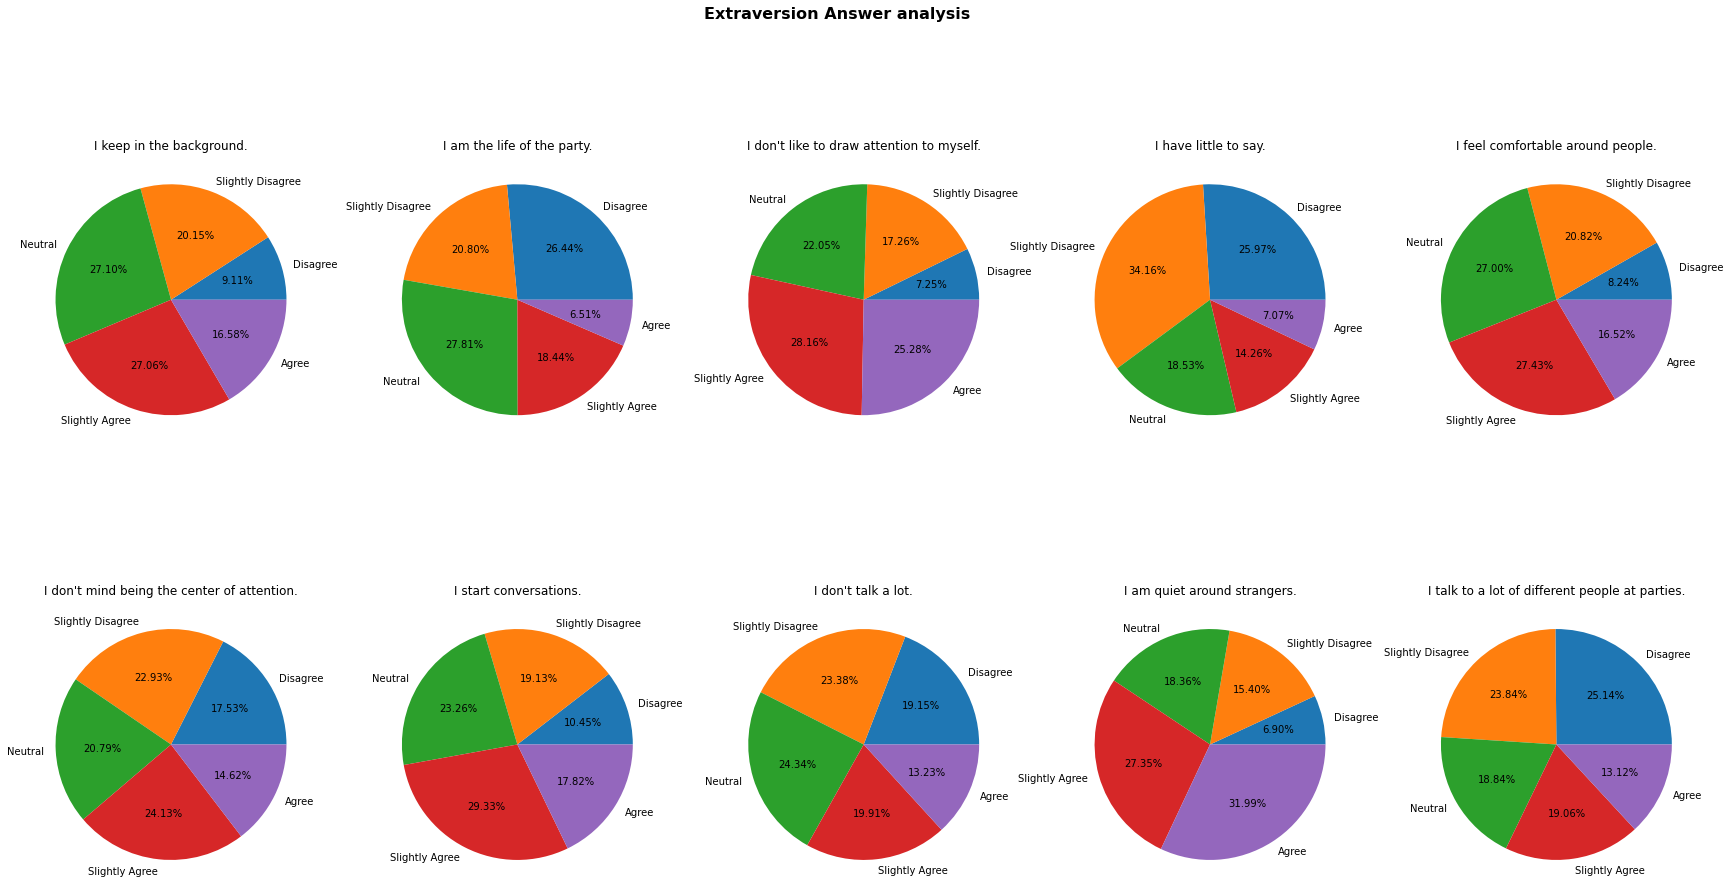

In [19]:
create_pie_chart("Extraversion")

- The percentage of strong agreement or disagreement with the questions is relatively low among most of the Extraversion questions.

- Nearly 60% of the respondents stated that they are quiet among strangers and about 55% stated that they don't like to draw attention to themselves.

- About 22% of the respondents remained neutral about the Extraversion questions.

<ipython-input-18-0b11040a7eef>:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


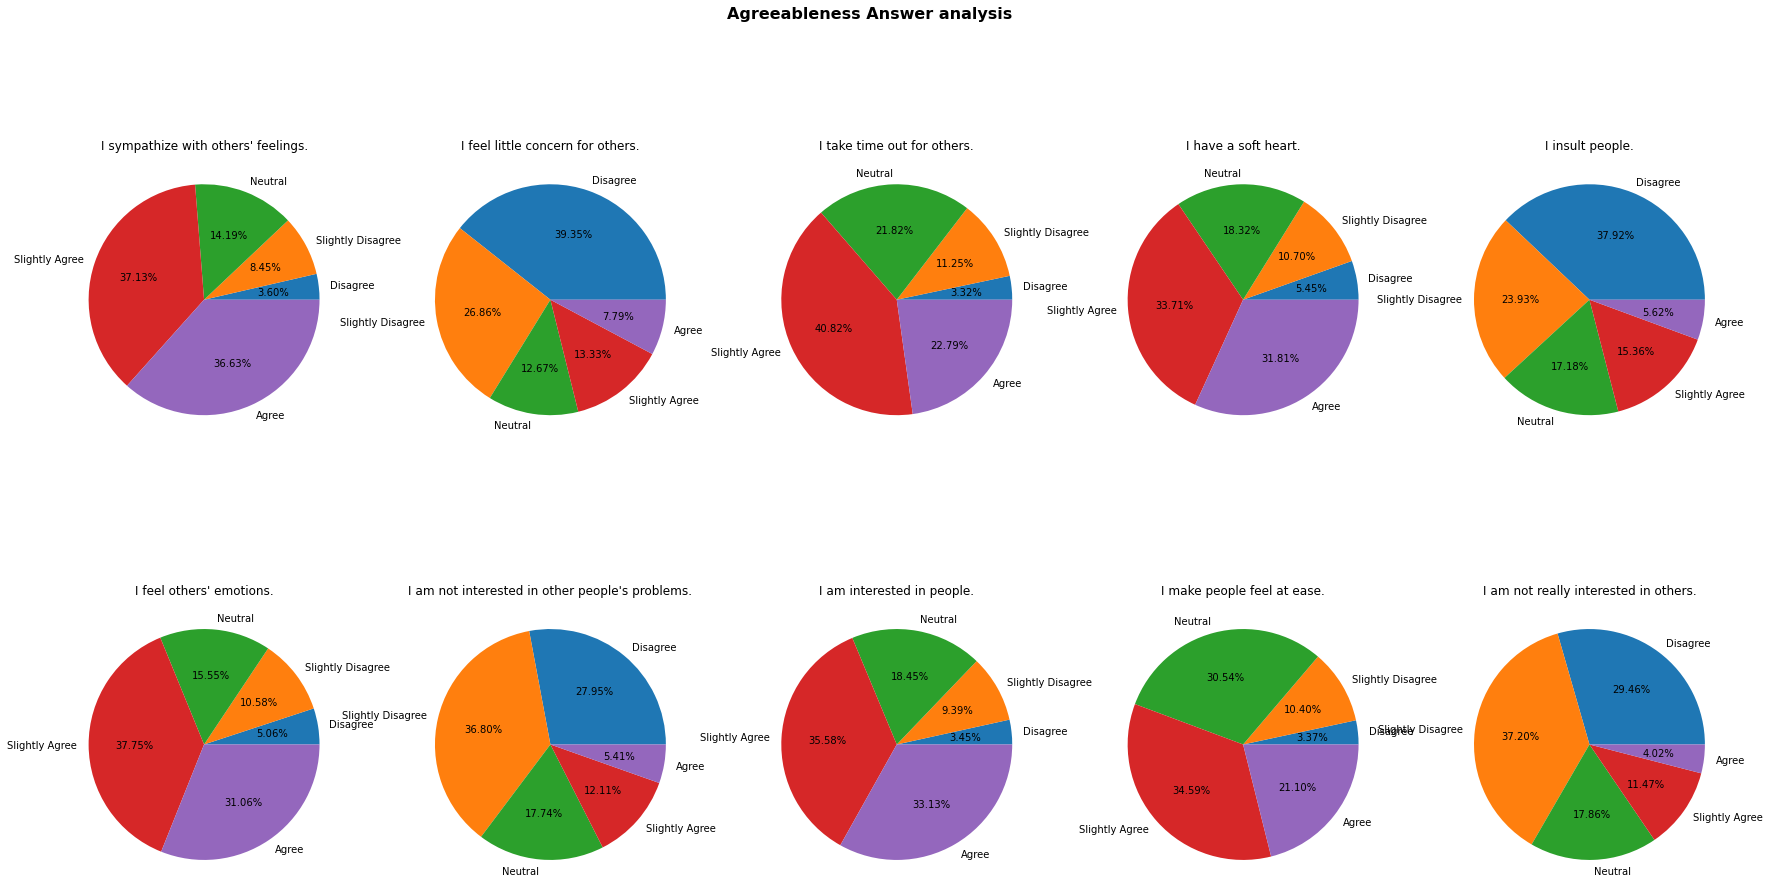

In [20]:
create_pie_chart("Agreeableness")

- The percentage of agreement with the positive questions and disagreement with the negative questions is very high in all the Agreeableness questions, thus stating that most of the respondents tend to be compassionate rather than antagonistic.

- However, the questions seemed to be antagonistic which might have led the respondents to answer these questions more positively.

- About 18% of the respondents remained neutral about the Agreeableness questions.

<ipython-input-18-0b11040a7eef>:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


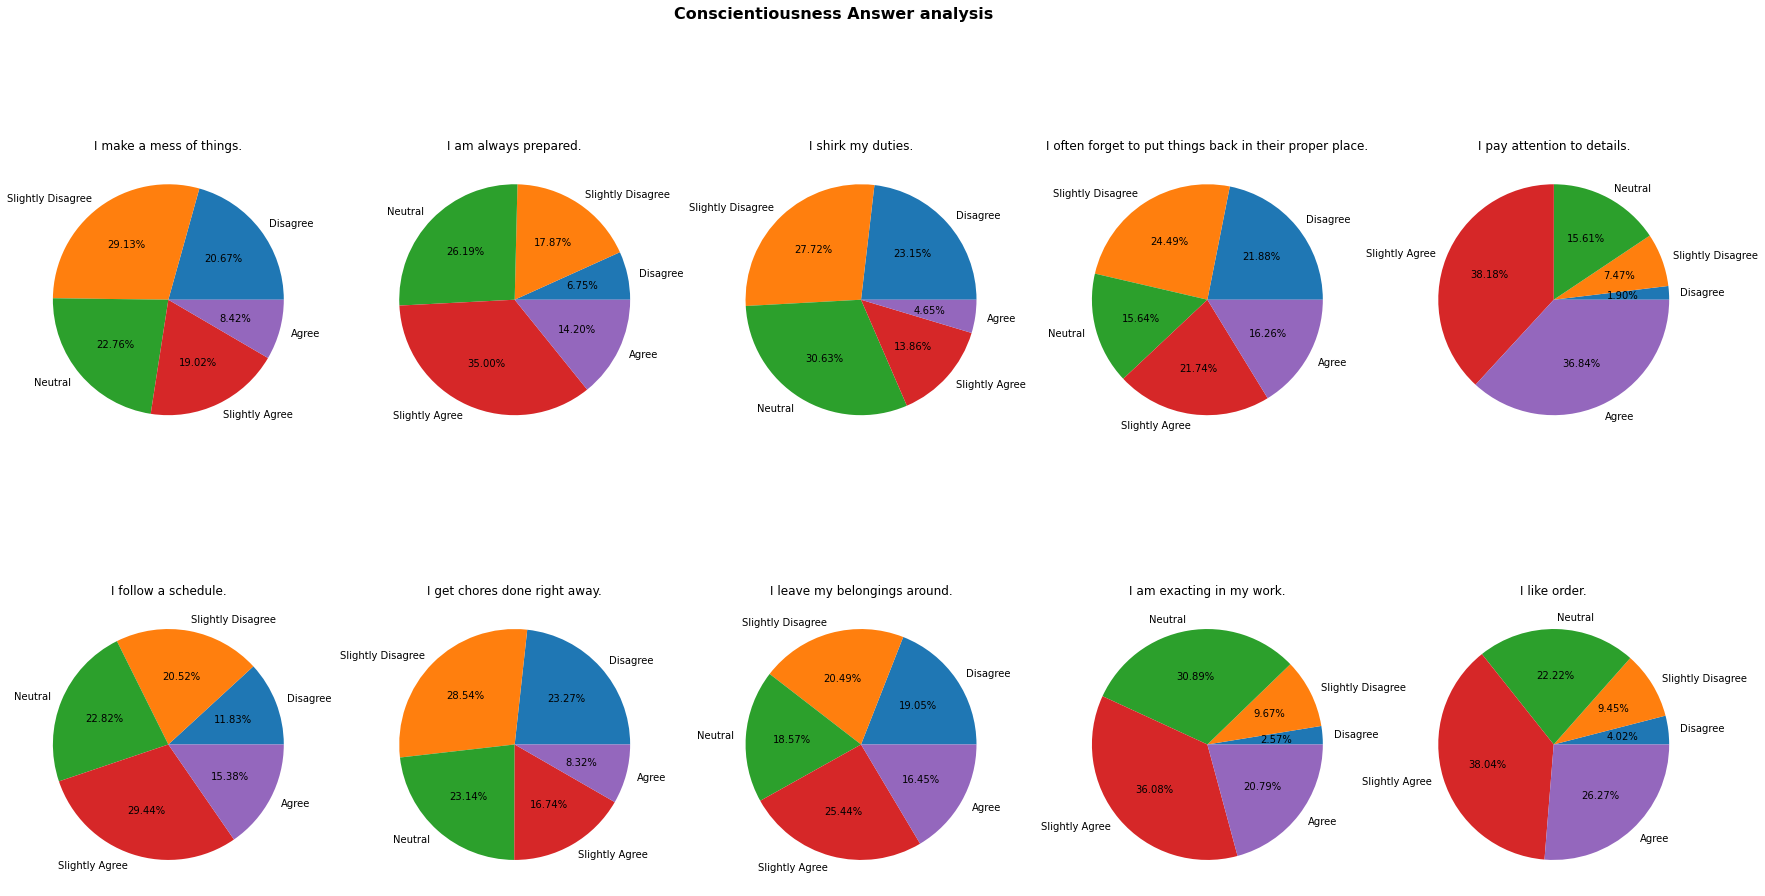

In [21]:
create_pie_chart("Conscientiousness")

- Nearly 75% of the respondents stated that they like to pay attention to details, and about 65% stated that they like things in order.

- About 25% of the respondents remained neutral about the Conscientiousness questions.

- Most of the negative Conscientiousness questions are equally distributed among the answers.

<ipython-input-18-0b11040a7eef>:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


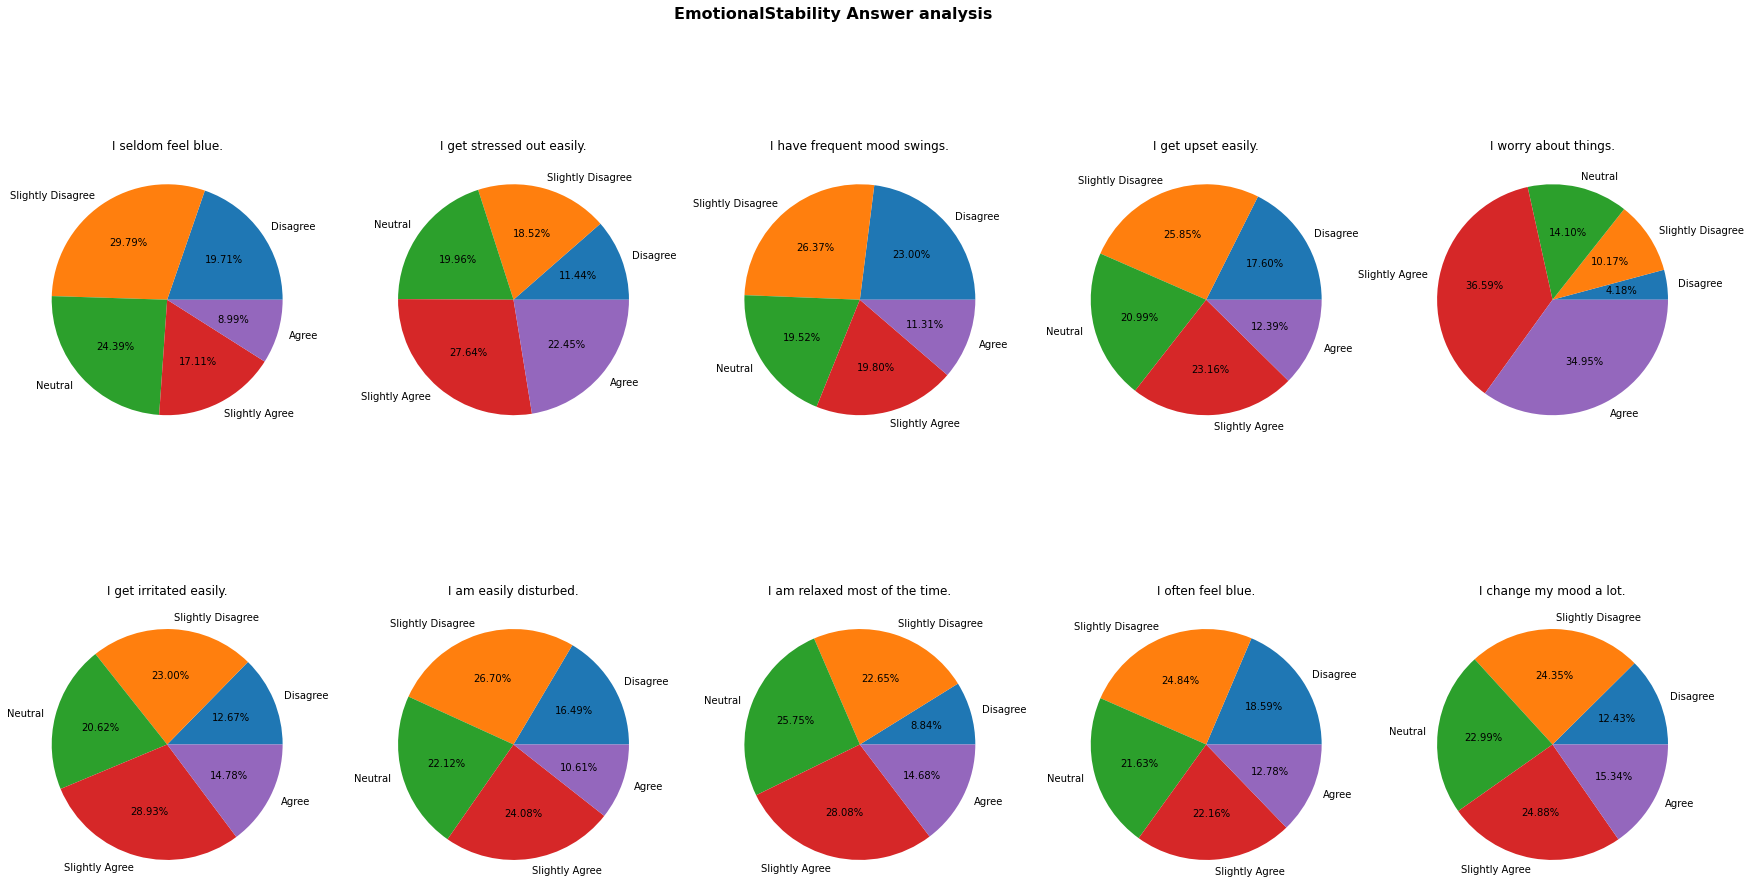

In [22]:
create_pie_chart("EmotionalStability")

- The percentage of strong agreement or disagreement with the questions is relatively low among most of the neuroticism questions.

- Nearly 72% of the respondents stated that they worry about things and about 50% stated that they get stressed out easily.

- About 21% of the respondents remained neutral about the emotional stability questions.

<ipython-input-18-0b11040a7eef>:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


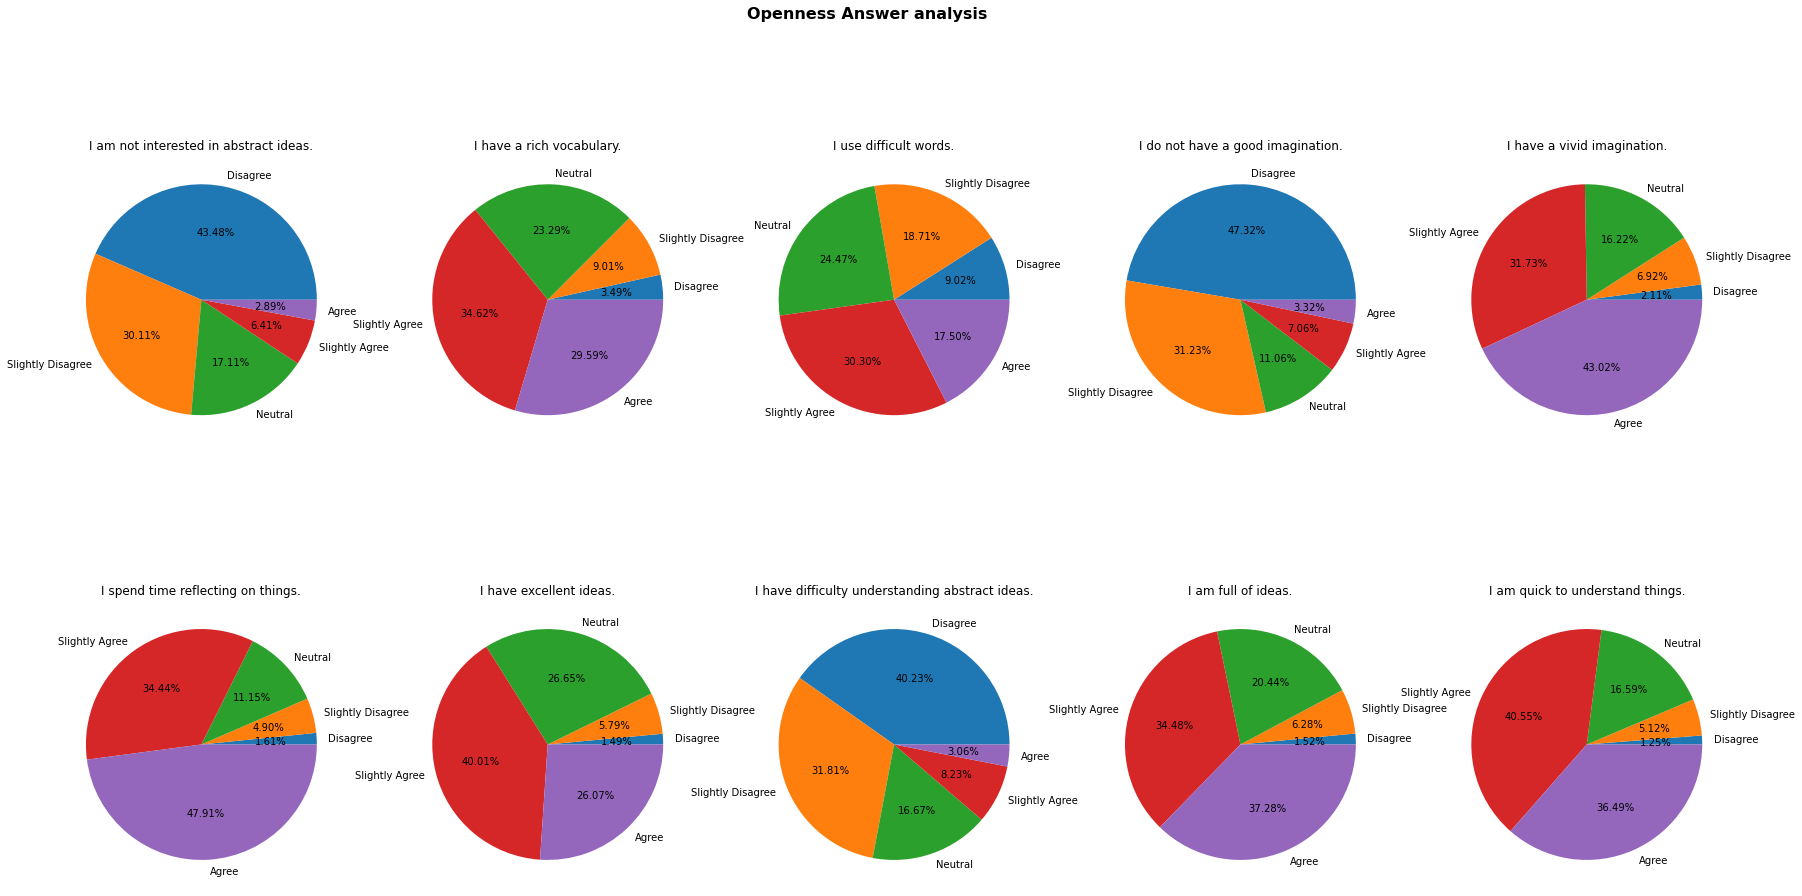

In [23]:
create_pie_chart("Openness")

- The percentage of agreement with the positive questions and disagreement with the negative questions is very high in all the Openness questions, Thus stating that most of the respondents are curious and inventive.

- About 18% of the respondents remained neutral about the Openness questions.

## Country of the participant.

The countries given in the dataset are of ISO2 standard we will convert them to ISO3, short name and classify them according to continents.

In [24]:
import country_converter as coco

countries_iso2 = list(big_five_df["country"].unique())
unknown_vals = ["AQ", "SX","TL"] 
countries_iso3 = coco.convert(names = countries_iso2, to = "ISO3")
short_name = coco.convert(names = countries_iso2, to = "name_short")

In [25]:
countries_dict = dict(zip(countries_iso2,countries_iso3))
short_name_dict = dict(zip(countries_iso2,short_name))

In [26]:
# Map the countries onto continents
import pycountry_convert as pc

country_series = pd.Series(countries_iso2)[~pd.Series(countries_iso2).isin(unknown_vals)]
continent_series = country_series.apply(lambda x:pc.country_alpha2_to_continent_code(x))

In [27]:
continent_dict = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'EU': 'Europe',
    'AF': 'Africa'
    
}
continent_series = continent_series.replace(continent_dict)
continent_dict = dict(zip(list(country_series),list(continent_series)))

In [28]:
#Mapping ISO3, short_name,continent to the ISO2 country in the Dataset.

big_five_df.rename(columns={"country":"country-iso2"},inplace=True)

In [29]:
big_five_df["country-iso3"]   = big_five_df["country-iso2"].replace(countries_dict)
big_five_df["country-short"]  = big_five_df["country-iso2"].replace(short_name_dict)
big_five_df["continent"]      = big_five_df["country-iso2"].replace(continent_dict)

In [30]:
#Get counts of how many people from each continent
big_five_df["continent"].value_counts()

North America    350544
Europe           129239
Asia              56941
Australia         36345
South America     15579
Africa             6412
TL                    5
SX                    4
AQ                    2
Name: continent, dtype: int64

 AQ is the abbreviation for Antarctica, SX is for Saint-Maarten, and TL is East Timor. 

In [31]:
country_cols = ["country-iso2","country-iso3","country-short","continent"] 
big_five_df[country_cols] = big_five_df[country_cols].astype("category")

In [32]:
country_table = big_five_df["country-iso2"].value_counts()
country_table = country_table.to_frame("count")

In [33]:
country_table["country-iso2"]  = country_table.index
country_table["country-short"] = country_table["country-iso2"].replace(short_name_dict)
country_table["country-iso3"]  = country_table["country-iso2"].replace(countries_dict)
country_table["continent"]     = country_table["country-iso2"].replace(continent_dict)
country_table["count_log"] = country_table["count"].apply(np.log)

In [34]:
import plotly.express as px

fig = px.treemap(country_table, 
                 path=[px.Constant("world"), 'continent', 'country-short'], 
                 values='count',
                 color='count',
                 title="TreeMap showing the number of responses around the world.", 
                 hover_data=['country-iso3'],
                 color_continuous_scale='RdBu')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show();

In [35]:
fig = px.choropleth(country_table, 
                    locations="country-short",
                    color="count_log", 
                    hover_name="country-short", #
                    hover_data=['count','country-short','continent'], 
                    color_continuous_scale='viridis', 
                    title='global distribution of the number of responses',
                    locationmode= 'country names' ,
                    projection='natural earth',
                    scope ='world') 
fig.show()

- Most of the respondents are from the United States followed by UK and Canada.

- The dark regions in the above map indicate the lower responses, most of them are African countries.

## What are the raw scores of the participants of different traits and how they are the distributed?

To analyze the Traits of the participants. we need to caluclate the raw scores for each individual Traits by using the answer values for each participant.we have formulae to calulate the raw scores. The answer value ranges from 1-5 and based on th nature of the question each question has positive or neagtive key which is used while caluclating the raw Trait scores.


We have considered the Formula for calculating the raw scores from https://openpsychometrics.org/printable/big-five-personality-test.pdf which are given below:

EXT = 20 + (1) ___ - (6) ___ + (11) ___ - (16) ___ + (21) ___ - (26) ___ + (31) ___ - (36) ___ + (41) ___ - (46) ___ = _____

AGR = 14 - (2) ___ + (7) ___ - (12) ___ + (17) ___ - (22) ___ + (27) ___ - (32) ___ + (37) ___ + (42) ___ + (47) ___ = _____

CSN = 14 + (3) ___ - (8) ___ + (13) ___ - (18) ___ + (23) ___ - (28) ___ + (33) ___ - (38) ___ + (43) ___ + (48) ___ = _____

EST = 38 - (4) ___ + (9) ___ - (14) ___ + (19) ___ - (24) ___ - (29) ___ - (34) ___ - (39) ___ - (44) ___ - (49) ___ = _____

OPN = 8 + (5) ___ - (10) ___ + (15) ___ - (20) ___ + (25) ___ - (30) ___ + (35) ___ + (40) ___ + (45) ___ + (50) ___ = _____



In [37]:
#We will define fucnctions to calulate the raw score for each trait.

def getExtraversionScore(df):
    """To Calcualte the Extraversion Score"""
    ExtraversionScore = 0
    ExtraversionScore = 20 + df['EXT1'] - df['EXT2'] + df['EXT3'] - df['EXT4'] + df['EXT5'] - df['EXT6'] + df['EXT7'] - df['EXT8'] + df['EXT9'] - df['EXT10']
    return ExtraversionScore

def getAgreeablenessScore(df):
    """To Calcualte the Agreeableness Score"""
    AgreeablenessScore = 0
    AgreeablenessScore = 14 - df['AGR1'] + df['AGR2'] - df['AGR3'] + df['AGR4'] - df['AGR5'] + df['AGR6'] - df['AGR7'] + df['AGR8'] + df['AGR9'] + df['AGR10']
    return AgreeablenessScore

def getConscientiousnessScore(df):
    """To Calcualte the Conscientiousness Score"""
    ConscientiousnessScore = 0
    ConscientiousnessScore = 14 + df['CSN1'] - df['CSN2'] + df['CSN3'] - df['CSN4'] + df['CSN5'] - df['CSN6'] + df['CSN7'] - df['CSN8'] + df['CSN9'] + df['CSN10']
    return ConscientiousnessScore

def getEmotionalStabilityScore(df):
    """To Calcualte the EmotionalStability Score"""
    EmotionalStabilityScore = 0
    EmotionalStabilityScore = 38 - df['EST1'] + df['EST2'] - df['EST3'] + df['EST4'] - df['EST5'] - df['EST6'] - df['EST7'] - df['EST8'] - df['EST9'] - df['EST10']
    return EmotionalStabilityScore

def getOpennessScore(df):
    """To Calcualte the Openness Score"""
    OpennessScore = 0
    OpennessScore = 8 + df['OPN1'] - df['OPN2'] + df['OPN3'] - df['OPN4'] + df['OPN5'] - df['OPN6'] + df['OPN7'] + df['OPN8'] + df['OPN9'] + df['OPN10'] 
    return OpennessScore 

In [38]:
big_five_df['Extraversion']       = big_five_df.apply( getExtraversionScore,        axis=1 ) 
big_five_df['Agreeableness']      = big_five_df.apply( getAgreeablenessScore,       axis=1 ) 
big_five_df['Conscientiousness']  = big_five_df.apply( getConscientiousnessScore,   axis=1 ) 
big_five_df['EmotionalStability'] = big_five_df.apply( getEmotionalStabilityScore,  axis=1 ) 
big_five_df['Openness']           = big_five_df.apply( getOpennessScore,            axis=1 ) 

In [40]:
#The raw scores should be in the range of zero to fourty, we will verify that.

score_cols = ["Extraversion","Agreeableness","Conscientiousness","EmotionalStability","Openness"]
big_five_df[score_cols] = big_five_df[score_cols].astype("int16")
scores_df = big_five_df[score_cols]
scores_test_filt = ((scores_df > 40) | (scores_df < 0))
scores_test_filt.sum()

Extraversion          0
Agreeableness         0
Conscientiousness     0
EmotionalStability    0
Openness              0
dtype: int64

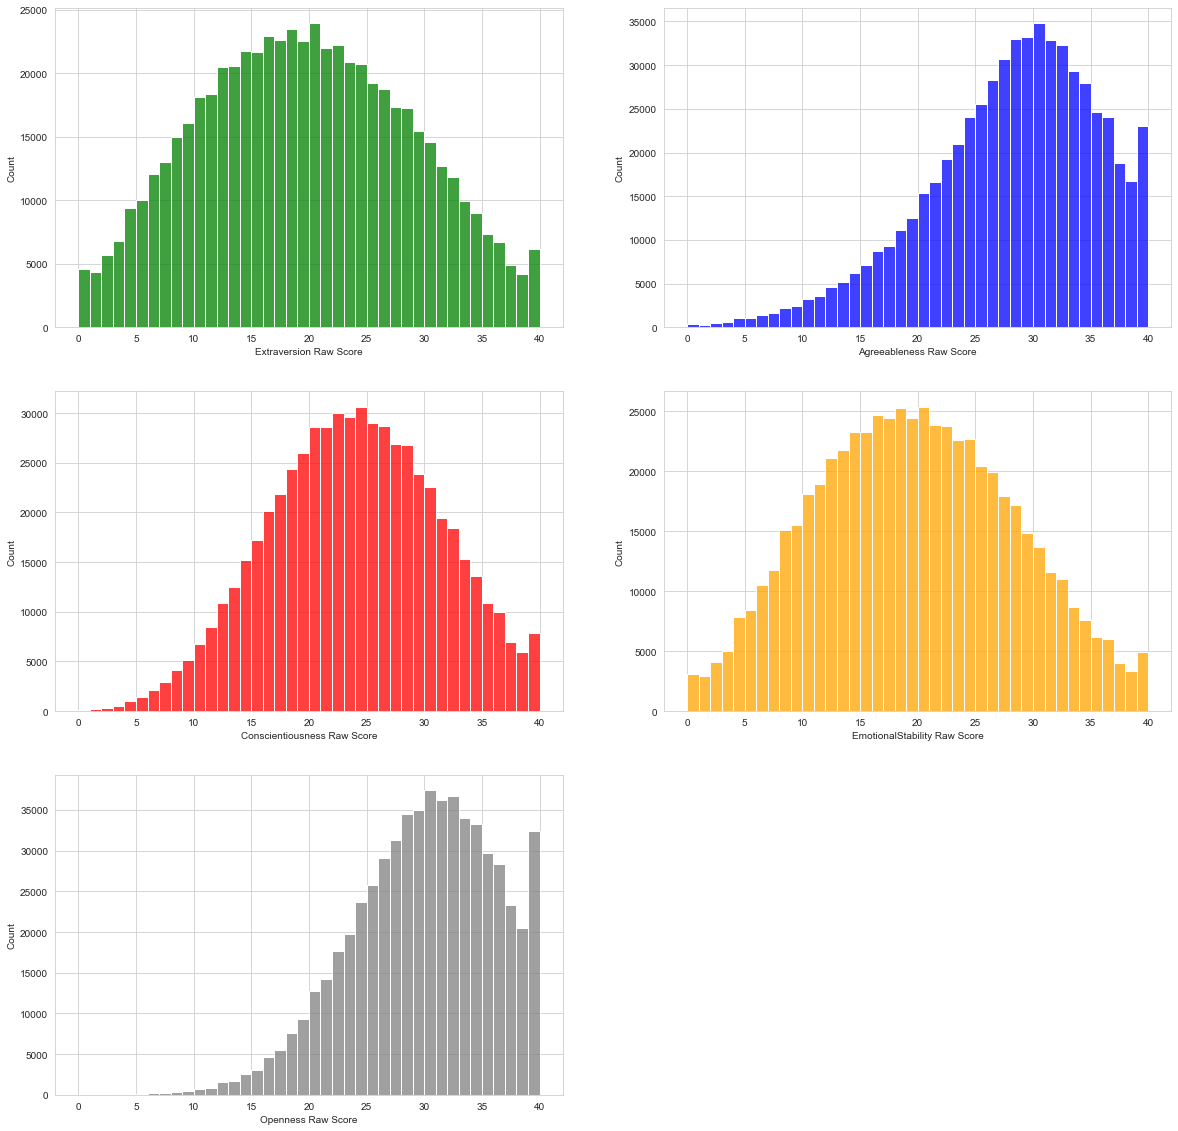

In [41]:
#Let's visualize the distruibution of raw scores of different traits.

colors_dict = {
    "Extraversion": "green", 
    "Agreeableness": "blue",
    "Conscientiousness":"red" ,
    "EmotionalStability": "orange" ,
    "Openness": "grey",    
} 
sns.set_style("whitegrid") 

def create_histogram(feature,ax):
    """To draw the distribution of the trait"""
    sns.histplot(x=feature,
             data=big_five_df,
             #kde=True,
             ax=ax,
             bins=40,
             color=colors_dict[feature])
    ax.set(xlabel = f"{feature} Raw Score") 
    
fig , ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3,ncols=2,figsize=(20,20))
ax6.set_axis_off()

create_histogram("Extraversion",ax1)
create_histogram("Agreeableness",ax2)
create_histogram("Conscientiousness",ax3)
create_histogram("EmotionalStability",ax4)
create_histogram("Openness",ax5)

From the frequency distribution of the personality trait's raw scores, we can see the below observations:


- The Raw scores of Extraversion and EmotionalStability are normally distributed, which suggests that most respondents have no strong tendencies toward these traits.


- The raw scores of Conscientiousness are slightly Skewed Right which suggests that more number of respondents report being efficient and organized.


- The Raw scores of Openness and Agreeableness are Skewed Right with an outlier at 40, which suggests that the respondents report being more friendly, compassionate, and comfortable with abstract or creative ideas.

## Is there any corrleation between raw scores of different traits?


In [42]:
corrleation_df = scores_df.corr()
corrleation_df

Extraversion  Agreeableness  Conscientiousness  \
Extraversion            1.000000       0.305552           0.068309   
Agreeableness           0.305552       1.000000           0.137173   
Conscientiousness       0.068309       0.137173           1.000000   
EmotionalStability      0.224677       0.040320           0.235188   
Openness                0.175059       0.102047           0.054676   

                    EmotionalStability  Openness  
Extraversion                  0.224677  0.175059  
Agreeableness                 0.040320  0.102047  
Conscientiousness             0.235188  0.054676  
EmotionalStability            1.000000  0.079021  
Openness                      0.079021  1.000000

<AxesSubplot:>

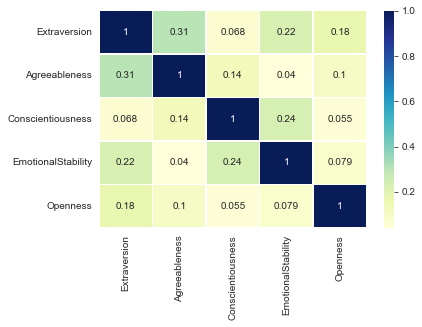

In [43]:
sns.heatmap(data=corrleation_df,
            linewidths=.5,
            annot=True,
            cmap="YlGnBu")

There are no strong correlations among the traits but we could observe that the Extraversion and Agreeableness are slightly correlated (0.30). Neuroticism (EmotionalStability) is also slightly correlated with Extraversion and Conscientiousness.


## What are the top 10 and bottom 10 countries that participated in the survey?


In [45]:
#Top 10 countries that participated in the survey.
country_table = country_table.sort_values(by="count",ascending=False)

fig=px.bar(y=country_table["count"].head(10),x=country_table["country-short"].head(10))
fig.update_layout(
    title="Top 10 countries that participated in the survey",
    xaxis_title="Country",
    yaxis_title="No of responses")

In [46]:
#The bottom 10 countries that are participated in the survey

fig=px.bar(y=country_table["count"].tail(10),x=country_table["country-short"].tail(10))
fig.update_layout(
    title="Bottom 10 countries that participated in the survey",
    xaxis_title="Country",
    yaxis_title="No of responses")

The number of responses of these countries are very low, so we will consider countries responses with more then 200 in the further analysis.

## Are there any countries which are in the top 10 in all the traits?


<ipython-input-49-4d55b3165263>:25: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



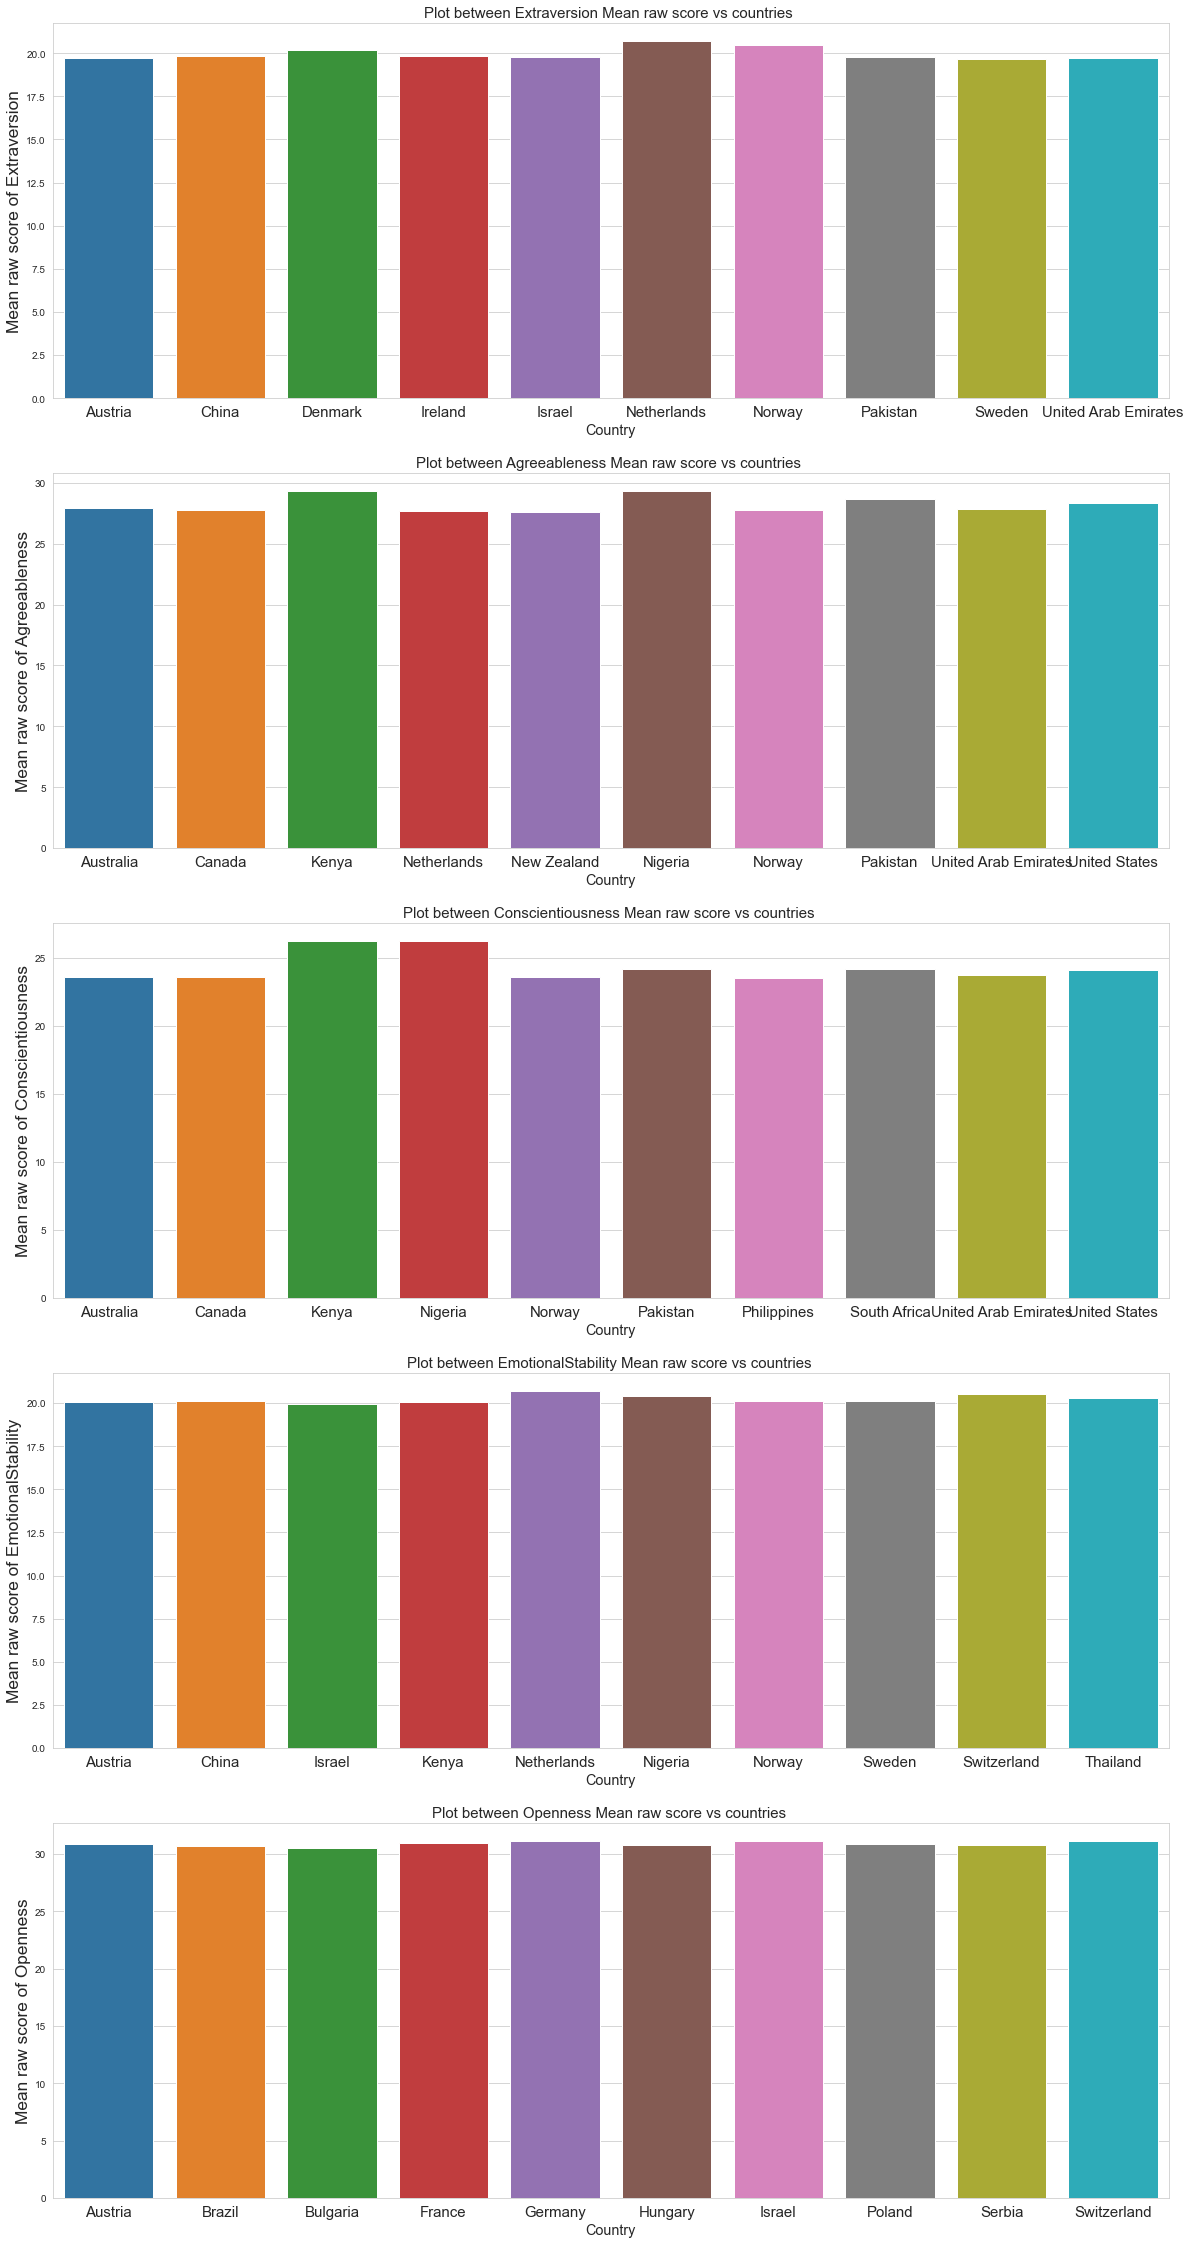

In [49]:
#Below is the function that plots the bar graph of top 10 countries for each trait.

country_group = big_five_df.groupby(by="country-short")
def create_barplot_top10(trait,ax):
    country_group = big_five_df.groupby(by="country-short")
    trait_df = country_group[trait].agg(["size","mean"])
    trait_df = trait_df[trait_df["size"] > 500].sort_values(by="mean",ascending=False).head(10).reset_index().copy()
    trait_df["country-short"]= trait_df["country-short"].cat.remove_unused_categories()
    ax = sns.barplot(y="mean", 
                    x="country-short", 
                    data=trait_df,
                    ax=ax)
    ax.set_xlabel("Country",fontsize="x-large")
    ax.set_ylabel(f"Mean raw score of {trait}",fontsize="xx-large")
    ax.tick_params(axis='x', which='both', labelsize=15)
    ax.set_title(f"Plot between {trait} Mean raw score vs countries ",fontsize=15)
    
    
fig , ((ax1,ax2,ax3,ax4,ax5)) = plt.subplots(nrows=5,figsize=(20,40))
create_barplot_top10("Extraversion",ax1)
create_barplot_top10("Agreeableness",ax2)
create_barplot_top10("Conscientiousness",ax3)
create_barplot_top10("EmotionalStability",ax4)
create_barplot_top10("Openness",ax5)
fig.show();


## What is distribution of raw scores for different traits around the world? What does this show?

In [50]:
#We will define the below function to draw the choropleth map that shows the mean distribution of raw scores around the world for different traits.

country_grouped_data = big_five_df.groupby(by="country-short")

triat_details_dict = {
    "Extraversion" :        ["Extraversion (Higher means more Extrovert)",'portland'],
    "Agreeableness":        ["Agreeableness (Higher means more friendly and compassionate)",'icefire'],
    "Conscientiousness":    ["Conscientiousness (Higher means more efficient and organised)","spectral"],
    "EmotionalStability":   ["EmotionalStability (Higher means more sensitive and nervous)","electric"],
    "Openness":             ["Openness (Higher means more are curious and inventive)","balance"]
}

def draw_choropleth(trait: str):
    trait_df = country_grouped_data[trait].agg(["size","mean"])
    trait_df = trait_df[trait_df["size"] > 200]
    fig = px.choropleth(trait_df, 
                    locations=trait_df.index,
                    color="mean", 
                    color_continuous_scale=triat_details_dict[trait][1], 
                    title=triat_details_dict[trait][0],
                    locationmode= 'country names' ,
                    projection='natural earth',
                    scope ='world') 
    fig.show();

In [51]:
draw_choropleth("Extraversion")

- Some of the eastern countries are seemed to be Extrovert, but most of the western countries are extroverts, Brazil being the lowest among them.
- The Netherlands seems to be more extroverted and Morocco seems to be less.

In [52]:
draw_choropleth("Agreeableness")

- Most of the South American countries seems to be more antagonistic than North American countries.

- Poland seems to be less compassionate. Kenya and the United States seem to be most compassionate followed by Australia and Canada.

In [53]:
draw_choropleth("Conscientiousness")

- Most of the European countries and South American countries seem to be less organised then the North American and Asian countries.

In [54]:
draw_choropleth("EmotionalStability")

- North American countries are less emotionally stable than the South American countries.
- The Netherlands seems to be the less Emotionally stable and Greece seems to more Emotionally stable.

In [55]:
draw_choropleth("Openness")

- Western countries are more open to new experiences than Eastern countries.
- Switzerland seems to be more open to experience and Malaysia seems to the least.

##  How do personality traits vary between continents?

In [56]:
#Below is the function to draw the distribution plot of different continents for different traits.

continent_group = big_five_df.groupby(by="continent")
continent_df = continent_group[score_cols].mean()
continent_df = continent_df.melt(ignore_index=False).reset_index()
continent_df.columns = ["continent","Trait","mean"]

<ipython-input-57-b4c66afa233e>:11: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



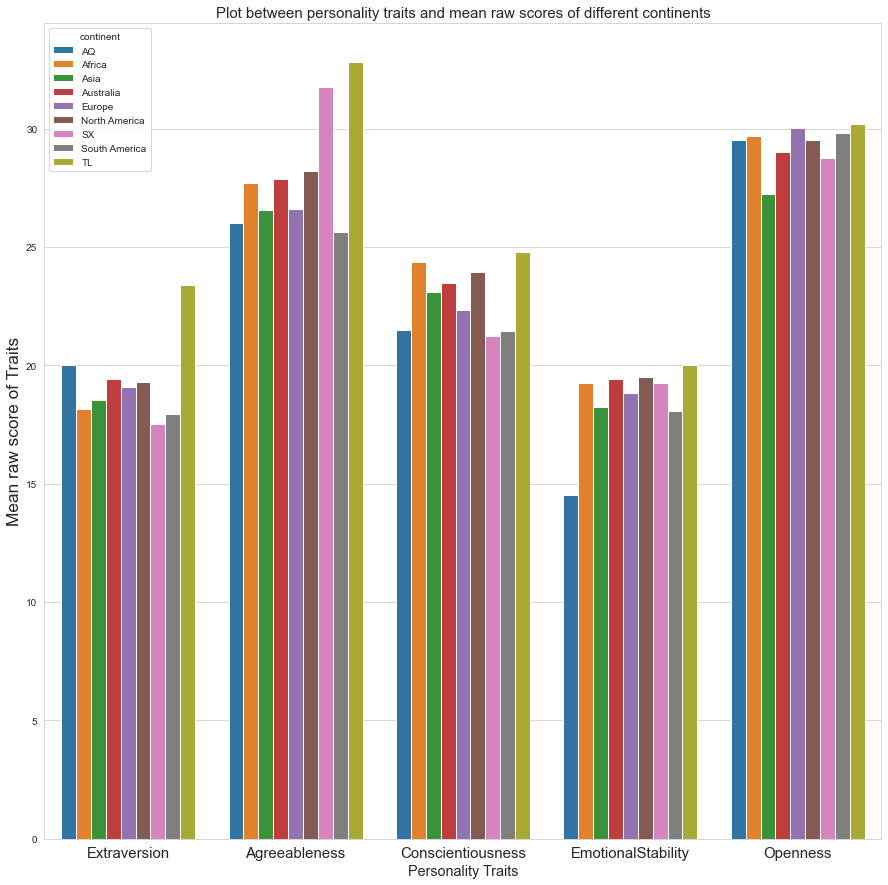

In [57]:
fig , ax = plt.subplots(figsize=(15,15))
ax = sns.barplot(x="Trait", 
                 y="mean", 
                 hue="continent", 
                 data=continent_df,
                 ax=ax)
ax.set_xlabel("Personality Traits",fontsize="x-large")
ax.set_ylabel("Mean raw score of Traits",fontsize="xx-large")
ax.tick_params(axis='x', which='both', labelsize=15)
ax.set_title("Plot between personality traits and mean raw scores of different continents",fontsize=15)
fig.show();


Australia and North America seems to be standout across the all the traits, where as South America has the low raw score across most of the traits.

## What percent of people answered Neutral, Agree and Disagree for more than 15 questions?

In [58]:
survey_ans_df = big_five_df[selected_cols[0:50]].apply(pd.Series.value_counts,axis=1).fillna(0)

In [59]:
survey_ans_df.rename(columns=answers_dict,inplace=True)
survey_ans_df.sample(5)

Disagree  Slightly Disagree  Neutral  Slightly Agree  Agree
887246      12.0                2.0      8.0             9.0   19.0
429949       8.0               15.0     10.0            12.0    5.0
667146      14.0                8.0      3.0             7.0   18.0
684501       5.0               13.0     18.0             9.0    5.0
576977      13.0                6.0      1.0            11.0   19.0

In [60]:
#Percentage of respondents who answered "Neutral" for more than 15 questions.
percentage_neutral = (survey_ans_df[survey_ans_df["Neutral"] > 15].shape[0]/survey_ans_df.shape[0])*100
percentage_neutral

17.061997643978618

In [61]:
#Percentage of respondents who answered "Agree" for more than 15 questions.
percentage_agree = (survey_ans_df[survey_ans_df["Agree"] > 15].shape[0]/survey_ans_df.shape[0])*100
percentage_agree

15.125085914117811

In [62]:
#Percentage of respondents who answered "Disagree" for more than 15 questions.
percentage_disagree = (survey_ans_df[survey_ans_df["Disagree"] > 15].shape[0]/survey_ans_df.shape[0])*100
percentage_disagree

5.849049945300645

In [63]:
#Percentage of respondents who answered "Slightly Disagree" or ""Slightly Agree"" for more than 15 questions.

percentage_slagree = (survey_ans_df[survey_ans_df["Slightly Disagree"] > 15].shape[0]/survey_ans_df.shape[0])*100
percentage_sldisagree = (survey_ans_df[survey_ans_df["Slightly Agree"] > 15].shape[0]/survey_ans_df.shape[0])*100

percentage_sl_agree_disagree = percentage_slagree + percentage_sldisagree
percentage_sl_agree_disagree


41.946759294269086

## What are the questions that are answered as agreed or disagreed most across all the traits?

In [64]:
answers_vals_df = big_five_df[selected_cols[0:50]].apply(pd.Series.value_counts,axis=0)
answers_vals_df

EXT1    EXT2    EXT3    EXT4    EXT5    EXT6    EXT7    EXT8    EXT9  \
1  157309  113933   49007   54199   62200  154545  149590   43157  104336   
2  123803  139128  123898  119931  113866  203295  141840  102687  136430   
3  165478  144838  160658  161235  138416  110287  112118  131215  123728   
4  109757  118452  163226  161032  174536   84861  113426  167586  143599   
5   38724   78720   98282   98674  106053   42083   78097  150426   86978   

    EXT10  ...    OPN1    OPN2    OPN3    OPN4    OPN5    OPN6    OPN7  \
1   41058  ...   20787  239369   12557  258728    8838  281600    7438   
2   91625  ...   53623  189297   41196  179168   34444  185826   30497   
3  109244  ...  138572   99221   96499  101834  158589   65831   98715   
4  162763  ...  206024   48949  188813   38136  238092   42033  241286   
5  190381  ...  176065   18235  256006   17205  155108   19781  217135   

     OPN8    OPN9   OPN10  
1   53647    9565    9028  
2  111364   29140   37383  
3  145608   66339  121625  
4  180319  204950  205175  
5  104133  285077  221860  

[5 rows x 50 columns]

In [65]:
#The personality question that most people answered as agree.
answers_vals_df.loc[5][answers_vals_df.loc[5] == answers_vals_df.loc[5].max()]

OPN9    285077
Name: 5, dtype: int64

In [66]:
question_df[question_df["column-name"] == "OPN9"]

column-name                       question-text
48        OPN9  I spend time reflecting on things.

The question that most respondents strongly agreed was "I spend time reflecting on things" which is a positive question. It suggests that most of the respondents spend some time on reflecting things in their lives.


In [67]:
#The personality question that most people answered as Disagree.
answers_vals_df.loc[5][answers_vals_df.loc[1] == answers_vals_df.loc[1].max()]

OPN6    19781
Name: 5, dtype: int64

In [68]:
question_df[question_df["column-name"] == "OPN6"]

column-name                      question-text
45        OPN6  I do not have a good imagination.

The question that most respondents strongly disagreed was "I do not have a good imagination." which is a negative question. It suggests that most of the respondents think that they have good imagination.

## Inferences and Conclusion

- From the frequency distributions of raw scores for different Traits, we could observe normal distributions for Extraversion and EmotionalStability, whereas the distributions for Openness and Agreeableness skewed right.


- The Extraversion and Agreeableness are slightly correlated (0.30) and Neuroticism is also slightly correlated with Extraversion and Conscientiousness.


- The percentage of solid agreement or disagreement with the questions is relatively low among most of the Extraversion, and Neuroticism questions which is the opposite for Openness and Agreeableness.


- About 25% of respondents remained neutral on one or more questions throughout the survey and about 17% answered as Neutral for more than 15 questions.


- As the survey conducted in English, we could see most of the responses from North American and European countries, slightly less number of responses are recorded from Asian and African countries.


- There is a significant difference between western and eastern populations, The western countries seem more open to experience and organized than the eastern countries.


- North American countries are less emotionally stable and more compassionate than south American countries.


- Australia is the only country which has High Mean Raw scores for all the personality traits around the world.

## References

- http://openpsychometrics.org/tests/IPIP-BFFM/
- https://www.kaggle.com/datasets/tunguz/big-five-personality-test
- https://jovian.ai/learn/zero-to-data-analyst-bootcamp
- https://taridwong.github.io/posts/2022-01-01-efacfa/
- https://psdlab.uoregon.edu/measuring-the-big-five-personality-domains/
- https://www.ibm.com/cloud/learn/exploratory-data-analysis
- https://www.iban.com/country-codes
- https://ipip.ori.org/newBigFive5broadKey.htm
- https://plotly.com/python-api-reference/index.html
- https://seaborn.pydata.org/
- https://pandas.pydata.org/